<div style="text-align: right">Authors:</div>
<div style="text-align: right"> Apoorva Mishra - 001438598</div>
<div style="text-align: right"> Srijoni Biswas - 001057367</div>
<div style="text-align: right"> Srinjoy Chakravarty - 001086186</div>



# Analysis On Harry Potter :

Welcome to the world of wizards!!

<br />
<left>
<img src="Contestants.png" width=600 />
</left>

In today's gathering, we present to you the following analysis about Harry Potter!

1. Gender Analysis in Harry Potter
2. Character Importance of each Character in Harry Potter
3. Quotes/ Dialogues by each Characters from the Manuscripts
4. Sentiment Analysis of each characters based on their Dialogues in Manuscripts
5. Time for Magic!
6. House Analysis: Gryffindor or Slytherin? Who's better?
7. Generating Word Clouds!
 

But ...
<br />
<left>
<img src="harry_potter_quotes11.jpg" width=600 />
</left>


    - Said the Algorithms when I ran it first! :D

# Gender Analysis in Harry Potter :

In [1]:
from __future__ import division
import glob
import nltk
from string import punctuation
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

**We base this gender analysis on two lists of words (Corpora) that are used when a man or woman is present.
These lists are based on Danielle Sucher's Jailbreak the Patriarchy**

*In 2011, Sucher wrote this Chrome Extension to swap out the gender of every pronoun and explicitly gendered term in any article the user reads on their browser.*

<left>
<img src="sucher.jpeg" width=600 />
</left>

In [2]:
male_words = set(['guy','spokesman','chairman',"men's",'men','him',"he's",'his','boy','boyfriend','boyfriends','boys','brother','brothers','dad','dads','dude','father','fathers','fiance','gentleman','gentlemen','god','grandfather','grandpa','grandson','groom','he','himself','husband','husbands','king','male','man','mr','nephew','nephews','priest','prince','son','sons','uncle','uncles','waiter','widower','widowers'])
female_words = set(['heroine','spokeswoman','chairwoman',"women's",'actress','women',"she's",'her','aunt','aunts','bride','daughter','daughters','female','fiancee','girl','girlfriend','girlfriends','girls','goddess','granddaughter','grandma','grandmother','herself','ladies','lady','lady','mom','moms','mother','mothers','mrs','ms','niece','nieces','priestess','princess','queens','she','sister','sisters','waitress','widow','widows','wife','wives','woman'])

**Next we write a method that categorizes sentences into Female / Male / Both / None based on their intersection with the aforemention corpora**

In [3]:
def gender_the_sentence(sentence_words):
    mw_length = len(male_words.intersection(sentence_words))
    fw_length = len(female_words.intersection(sentence_words))
    if mw_length > 0 and fw_length == 0:
        gender = 'male'
    elif mw_length == 0 and fw_length > 0:
        gender = 'female'
    elif mw_length > 0 and fw_length > 0:
        gender = 'both'
    else:
        gender = 'none'
    return gender

**Next we write a method to identify people's names as these are already gendered by society. To identify these proper nouns, we count how many times a word's first letter is capitalized and how many times it isn't. This method is fairly robust with large text and when the first words of sentences are ignored!**

In [7]:
def is_it_proper(word):
        if word[0] == word[0].upper():
            case = 'upper'
        else:
            case = 'lower'
        word_lower = word.lower()
        try:
            proper_nouns[word_lower][case] = proper_nouns[word_lower].get(case,0)+1
        except Exception as e:
            #This is triggered when the word hasn't been seen yet
            proper_nouns[word_lower] = {case:1}

**Next we write a method that keeps track of each the words in each sentence with some counters. The method increments the word_freq, word_counter, and sentence_counter dictionaries.**

In [8]:
def increment_gender(sentence_words,gender):
    sentence_counter[gender] += 1
    word_counter[gender] += len(sentence_words)
    for word in sentence_words:
        word_freq[gender][word] = word_freq[gender].get(word,0) + 1


**We initialize our counters to store the various quantities of interest and denote our file list as being all 7 books in .txt format**

In [10]:
sexes = ['male','female','none','both']
sentence_counter = {sex:0 for sex in sexes}
word_counter = {sex:0 for sex in sexes}
word_freq = {sex:{} for sex in sexes}
proper_nouns = {}
file_list = glob.glob('*.txt')

**For each book in the series we then do the following...**

In [11]:
for file_name in file_list:
    
    # Open the file
    text_bytes = open(file_name,'rb').read()
    
    # Convert bytes to string
    text = text_bytes.decode('utf-8')
    
    # Split into sentences
    sentences = tokenizer.tokenize(text)
    for sentence in sentences:
        
        # word tokenize and strip punctuation
        sentence_words = sentence.split()
        sentence_words = [w.strip(punctuation) for w in sentence_words if len(w.strip(punctuation)) > 0]
        
        # figure out how often each word is capitalized
        [is_it_proper(word) for word in sentence_words[1:]]
        
        # lower case it
        sentence_words = set([w.lower() for w in sentence_words])
        
        # Figure out if there are gendered words in the sentence by computing the length of the intersection of the sets
        gender = gender_the_sentence(sentence_words)
        
        # Increment some counters
        increment_gender(sentence_words, gender)

**We create a set consisting of all words which were capitalized more often than not!**

In [12]:
proper_nouns = set([word for word in proper_nouns if
                  proper_nouns[word].get('upper', 0) /
                  (proper_nouns[word].get('upper', 0) +
                  proper_nouns[word].get('lower', 0)) > .50])

**We select the top 1,000 words, based on frequencies, from both the male and female word dictionaries**

In [13]:
common_words = set([w for w in sorted (word_freq['female'],
                                     key = word_freq['female'].get, reverse = True)[:1000]] + [w for w in sorted (word_freq['male'], key = word_freq['male'].get, reverse = True)[:1000]])

**From the list we subtract the words used to identify the sentence as either male or female and also subtract the proper nouns**

In [14]:
common_words = list(common_words - male_words - female_words - proper_nouns)

**We then compute how likely each word appears in a male subject sentence versus a female subject sentence.
For example, if 'hair' is mentioned in 10 male-subjected sentences and 10 female-subject sentences,
where there is a total of 20 female-subject (50%) sentences and 100 male-subject sentences (10%),
we'll score 'hair' as a 16.6% male, which is (10%)/(50%+10%), and 83.4% female (1:5).**

In [15]:
male_percent = {word:(word_freq['male'].get(word,0) / word_counter['male'])
              / (word_freq['female'].get(word,0) / word_counter['female'] + word_freq['male'].get(word,0) / word_counter['male']) for word in common_words}

**We now print our gender statistics from our counters**

In [16]:
gendered_percentage = (100*(sentence_counter['male'] + sentence_counter['female'])/
                           (sentence_counter['male'] + sentence_counter['female'] + sentence_counter['both'] + sentence_counter['none']))
print(str(gendered_percentage) + " % of sentences in Harry Potter are gendered!")
men_sentences = sentence_counter['male']
print(str(men_sentences) + " sentences in Harry Potter are about men.")
women_sentences = sentence_counter['female']
print(str(women_sentences) + " sentences in Harry Potter are about wommen.")
print("J.K Rowling uses " + str(men_sentences / women_sentences) + " times more sentences about men than about women...")
print("...but that's okay because the main protagonist and antagonist are both male!")

33.519321073759755 % of sentences in Harry Potter are gendered!
25460 sentences in Harry Potter are about men.
6019 sentences in Harry Potter are about wommen.
J.K Rowling uses 4.229938527994683 times more sentences about men than about women...
...but that's okay because the main protagonist and antagonist are both male!


**For each of the 50 'most' distinctively male words,
we print the ratio of gendered sentences in which it is used,
along with the count of male-subject and female-subject sentences that had the word.**

In [17]:
header = 'Rank\tRatio\tMale\tFemale\tWord'
print('Male words')
print(header)
rank = 1
for word in sorted(male_percent, key = male_percent.get,reverse = True)[:50]:
    try:
        ratio = male_percent[word] / (1 - male_percent[word])
    except:
        ratio = 100
    print('%s\t%.1f\t%02d\t%02d\t%s' % (str(rank), ratio, word_freq['male'].get(word, 0), word_freq['female'].get(word, 0), word))
    rank += 1

Male words
Rank	Ratio	Male	Female	Word
1	12.9	60	01	voices
2	9.5	666	15	felt
3	9.1	169	04	pain
4	8.9	83	02	map
5	7.8	218	06	scar
6	7.3	136	04	realized
7	7.0	65	02	beard
8	6.9	64	02	summer
9	6.9	64	02	brain
10	6.8	63	02	prophecy
11	6.4	89	03	wondered
12	6.1	57	02	flat
13	6.0	56	02	die
14	4.8	89	04	remembered
15	4.4	62	03	footsteps
16	4.4	62	03	sky
17	4.3	80	04	needed
18	4.3	60	03	burning
19	4.0	75	04	roared
20	3.9	72	04	dragon
21	3.7	293	17	he’d
22	3.4	64	04	stretched
23	3.4	64	04	thoughts
24	3.4	96	06	stomach
25	3.4	111	07	snake
26	3.4	63	04	goblin
27	3.3	107	07	darkness
28	3.3	61	04	surface
29	3.3	76	05	power
30	3.3	91	06	below
31	3.2	74	05	part
32	3.1	73	05	beyond
33	3.1	58	04	shock
34	3.1	101	07	ago
35	3.1	158	11	pocket
36	3.1	185	13	body
37	3.0	111	08	knees
38	2.9	67	05	lake
39	2.8	106	08	golden
40	2.8	90	07	expected
41	2.8	64	05	skin
42	2.8	64	05	dormitory
43	2.8	64	05	living
44	2.7	115	09	trunk
45	2.6	218	18	feel
46	2.6	242	20	feeling
47	2.6	60	05	sleep
48	2.5	83	07	hardly
49	2.5

**For each of the 50 'most' distinctively female words,
we print the ratio of gendered sentences in which it is used,
along with the count of male-subject and female-subject sentences that had the word.**

In [19]:
print('\n'*2)
print('Female words')
print(header)
rank = 1
female_words = sorted(male_percent, key = male_percent.get, reverse = False)[:51]
female_words.remove('mione')
for word in female_words:
    try:
        ratio = (1 - male_percent[word]) / male_percent[word]
    except:
        ratio = 100
    print('%s\t%.1f\t%01d\t%01d\t%s' % (str(rank), ratio,word_freq['male'].get(word, 0), word_freq['female'].get(word, 0), word))
    rank += 1




Female words
Rank	Ratio	Male	Female	Word
1	100.0	0	19	blonde
2	107.0	1	23	clipboard
3	74.5	1	16	handbag
4	17.7	5	19	dear,”
5	15.8	5	17	beaded
6	13.2	6	17	girls’
7	12.1	5	13	briskly
8	11.9	29	74	she’s
9	11.6	10	25	she’d
10	11.2	5	12	sweet
11	10.9	6	14	she?”
12	7.6	8	13	gown
13	7.6	8	13	silly
14	6.6	17	24	crying
15	5.7	13	16	cheeks
16	5.7	18	22	shrieked
17	5.2	33	37	pink
18	4.7	15	15	sobbing
19	4.1	56	49	witch
20	4.0	15	13	upset
21	4.0	15	13	dressing
22	4.0	29	25	love
23	3.9	38	32	screamed
24	3.9	64	53	tears
25	3.8	46	38	cried
26	3.8	22	18	we’d
27	3.7	48	38	snapped
28	3.4	27	20	pretty
29	3.4	19	14	dress
30	3.4	25	18	impatiently
31	3.3	112	80	bag
32	3.2	33	23	tone
33	3.2	28	19	bathroom
34	3.2	31	21	drink
35	3.1	36	24	brown
36	3.0	20	13	anxiously
37	2.9	29	18	marched
38	2.8	43	26	eyebrows
39	2.7	24	14	lip
40	2.6	25	14	ignored
41	2.6	34	19	whisper
42	2.5	39	21	homework
43	2.4	50	26	you’ll
44	2.4	27	14	what?”
45	2.4	27	14	coldly
46	2.4	37	19	library
47	2.4	41	21	terrified
48	2.3	28	14	won

# Character Analysis in Harry Potter :

**First we set up a bunch of imports to prepare for character importance analysis**

In [20]:
import nltk, os, pickle
from io import StringIO
from nltk import pos_tag, word_tokenize
from os import listdir
from os.path import isfile, join
from pdfminer.converter import TextConverter
from pdfminer.pdfdocument import PDFDocument
from pdfminer.pdfinterp import resolve1
from pdfminer.pdfpage import PDFPage
from pdfminer.pdfparser import PDFParser
from tika import parser
from collections import Counter

**Next we write a function to count the number of pages in each of the 7 books**

In [22]:
def count_pages(path):
    page_count_dict = {}
    for file in os.listdir(mypath):
        if file.endswith(".pdf"):
            with open(file, 'rb') as f:
                parser = PDFParser(f)
                book = PDFDocument(parser)
                page_count_dict[file] = resolve1(book.catalog['Pages'])['Count']
            f.close()
    return page_count_dict

**Thirdly, we write a function that coalasces all text from all the Harry Potter series into a single string**

In [25]:
def compile_harry_potter_books(path):
    all_books_text = ""
    for file in os.listdir(mypath):
        if file.endswith(".pdf"):
            with open(file, 'rb') as f:
                raw_parser = parser.from_file(file)
                current_book_text = raw_parser['content']
                all_books_text += " ".join([all_books_text, current_book_text])
            f.close()
    return all_books_text

**We then write a function to read the harry potter books into python from a directory of pdfs.**

In [26]:
def read_text():
    all_books_text = []
    mypath = os.getcwd()
    for file in os.listdir(mypath):
        if file.endswith(".pdf"):
            with open(file, 'rb') as f:
                parser = PDFParser(f)
                book = PDFDocument(parser)
                all_books_text.append(book)
            f.close()
    return all_books_text

**We then write this function to split words and puctuation in the block of text created in
    the 'read_text' function into one giant list where each item is a word or
    punctuation. For example, "Draco hung back for a last word with Severus and
    Regulus." becomes ['Draco', 'hung', 'back', 'for', 'a', 'last', 'word',
    'with', 'Severus', 'and', 'Regulus', '.']**

In [27]:
def text_tokenize(book):
    tokenize = word_tokenize(book)
    return tokenize

Next, this function takes the tokenized text created by the text_tokenize function
    and tags each word with a code for the part of speech it represents
    using NLTK's algorithm.  So, it changes the tokenized output:
    ['Crabbe', 'hung', 'back', 'for', 'a', 'last', 'word',
    'with', 'Tom', 'and', 'Goyle', '.']
    - TO -
    [('Crabbe', 'NNP'),
    ('hung', 'VBD'), ('back', 'RP'), ('for', 'IN'), ('a', 'DT'), ('last', 'JJ'),
    ('word', 'NN'), ('with', 'IN'), ('Tom', 'NNP'), ('and', 'CC'),
    ('Goyle', 'NNP'), ('.', '.')]

In [28]:
def tagging(tokenize):
    tagged_text = pos_tag(tokenize)
    return tagged_text

**Next we write a function that takes in the tagged text from the tagging function and returns
    a list of words that were tagged as proper nouns. It does this by looking
    at the second value in each word/tag pair - e.g. ('Lucius', 'NNP') and determining
    if is is equal to 'NNP'.
    There are a lot of characters in these novels who are referred to with two
    proper nouns, like 'Professor Quirell', 'Mrs. Malfoy', or 'Uncle Vernon',
    and any character can be called by their full name (e.g. 'Salazar Slytherin').
    So, if the second value IS equal to 'NNP', we check the second value of the
    next word - if it is also equal to 'NNP', we string the two words together
    and add them to the proper_nouns list.
    If the second value ISN'T equal to 'NNP', we append (add) only the first
    word to the proper_nouns list.
    As we add nouns to the list, we put them all in lower case - otherwise, our
    program won't know that 'HARRY' is the same thing for our purposes as 'Harry'.**

In [29]:
def find_proper_nouns(tagged_text):
    proper_nouns = []
    i = 0
    while i < len(tagged_text):
        if tagged_text[i][1] == 'NNP':
            if tagged_text[i+1][1] == 'NNP':
                proper_nouns.append(tagged_text[i][0].lower() +
                                    " " + tagged_text[i+1][0].lower())
                i+=1 # extra increment added to the i counter to skip the next word
            else:
                proper_nouns.append(tagged_text[i][0].lower())
        i+=1 # increment the i counter
    return (proper_nouns)

**Finally, we write a function that takes the proper_nouns from the list created by the
    find_proper_nouns function and counts the instances of each using
    the most_common method that comes with the counter.**

In [ ]:
def summarize_text(proper_nouns, top_num):
    counts = dict(Counter(proper_nouns).most_common(top_num))
    return counts

**The main method then just calls the above functions in order and outputs all the proper nouns into a pickle so it can be used for further analysis.**

In [ ]:
mypath = os.getcwd()
print(mypath)
all_harry_potter_text = compile_harry_potter_books(mypath)
print(count_pages(mypath))
tokenized_all_harry_potter = text_tokenize(all_harry_potter_text)
nltk.download('averaged_perceptron_tagger')
tagged_all_harry_potter = tagging(tokenized_all_harry_potter)
proper_nouns_all_harry_potter = find_proper_nouns(tagged_all_harry_potter)
top_hundred_proper_nouns_all_harry_potter = summarize_text(proper_nouns_all_harry_potter, 100)
print(top_hundred_proper_nouns_all_harry_potter)
pickle_out = open("hp_characters.pickle","wb")
pickle.dump(top_hundred_proper_nouns_all_harry_potter, pickle_out)
pickle_out.close()

**Now we do further analysis by loading in the pickle but first some more imports...**

In [1]:
import nltk, pickle, re
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import squarify
from itertools import islice

**We define the take method to iterate over dictionaries later.**

In [2]:
def take(n, iterable):
    return list(islice(iterable, n))

**And some Python code to convert into dictionary**

In [3]:
def Convert(tup, di):
    di = dict(tup)
    return di

**Time to load in those pickled proper nouns**

In [4]:
pickle_in = open("hp_proper_nouns.pickle","rb")
nouns_dict = pickle.load(pickle_in)
hp_nouns = sorted(list(nouns_dict.keys()))
long_nouns = [noun for noun in hp_nouns if (len(noun) - noun.count(' ')) > 2]
extra_characters = []

**Let's get rid of proper nouns that are not specific character names in the Harry Potter Universe and then do some data cleansing and reconcilliation...**

In [5]:
non_names = ["beauxbatons", "christmas", "death eaters", "hes", "hogwarts", "sirius"]
for noun in long_nouns:
    if (noun.endswith('s')):
        if (noun not in non_names):
            extra_characters.append(noun)
extra_characters_dict = {k: nouns_dict[k] for k in extra_characters}
amended_characters_dict = {}
dropped_s_list = []
for extra_character in extra_characters:
    extra_character_value = extra_characters_dict.get(extra_character)
    amended_key = extra_character[:-1]
    if (amended_key != "dursley"):
        dropped_s_list.append(amended_key)
    amended_characters_dict[amended_key] = extra_character_value
original_characters_dict = {k: nouns_dict[k] for k in dropped_s_list}
dudley_dict = {key: value for key, value in nouns_dict.items() if "dudley" in key}
dursley_dict = {key: value for key, value in amended_characters_dict.items() if "dursley" in key}
key = "dudley dursley"
value = dudley_dict.get("dudley") + dursley_dict.get("dursley")
dudley_dursley_dict = {key: value}
del amended_characters_dict['dursley']
sirius_dict = {key: value for key, value in nouns_dict.items() if "sirius" in key}
black_dict = {key: value for key, value in nouns_dict.items() if "black" in key}
key = "sirius black"
value = sirius_dict.get("sirius") + black_dict.get("black")
sirius_black_dict = {key: value}
combined_dict = {k: amended_characters_dict[k] + original_characters_dict[k] for k in amended_characters_dict}
harry_potter_dict = {key: value for key, value in nouns_dict.items() if "harry potter" in key}
potter_dict = {key: value for key, value in nouns_dict.items() if "potter" in key}
weasley_dict = {key: value for key, value in nouns_dict.items() if "weasley" in key and len(key) == 7}
professor_dumbledore_dict = {key: value for key, value in nouns_dict.items() if "professor dumbledore" in key}
combined_dict.update(dudley_dursley_dict)
combined_dict.update(sirius_black_dict)
combined_dict['harry'] += harry_potter_dict['harry potter']
combined_dict['harry'] += potter_dict['potter']
combined_dict['ron'] += weasley_dict['weasley']
combined_dict['dumbledore'] += professor_dumbledore_dict['professor dumbledore']
reduced_wordlist =  [word for word in long_nouns if word not in dropped_s_list]
further_reduced_wordlist = [word for word in reduced_wordlist if word not in extra_characters]

**Time to remove some common nouns and add together different naming conventions for the same characters...i.e. Harry, Harry Potter, Potter etc.**

In [6]:
common_nouns = ['azkaban', 'beauxbatons', 'chapter', 'christmas', 'come', 'cup', 'daily prophet', 'death eaters', 'did', 'dont',
'durmstrang', 'get', 'great hall', 'gryffindor', 'hall', 'hes', 'hogwarts', 'ill', 'invisibility cloak', 'ive',
'just', 'magic', 'ministry', 'muggle', 'page', 'professor', 'quidditch', 'slytherin', 'well']

other_characters = [word for word in further_reduced_wordlist if word not in common_nouns]
other_characters_dict = {k: nouns_dict[k] for k in other_characters}

del other_characters_dict['sirius']
del other_characters_dict['black']
del other_characters_dict['harry potter']
del other_characters_dict['potter']
del other_characters_dict['weasley']
del other_characters_dict['dudley']
del other_characters_dict['professor dumbledore']
combined_dict.update(other_characters_dict)

**[Optional: cam skip to heatmap]**

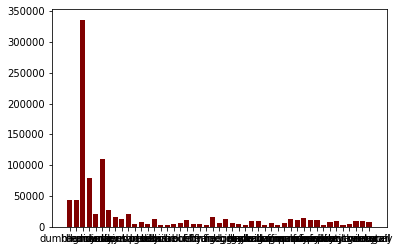

In [8]:
plt.bar(combined_dict.keys(), combined_dict.values(), color='maroon')
plt.show()

**Let's create a dataframe by converting dict to list of items**

In [13]:
index_range = list(range(0, 47))
harry_potter_dfObj = pd.DataFrame(list(combined_dict.items()), index = index_range, columns=['Name', 'Mentions'])
sorted_hp_dataframe = harry_potter_dfObj.sort_values('Mentions', ascending = False)
print(sorted_hp_dataframe)

                    Name  Mentions
2                  harry    336037
5                    ron    109951
3               hermione     79998
0             dumbledore     43612
1                 hagrid     43353
6                  snape     26464
9           sirius black     21444
4                  moody     21168
22                  fred     15915
7              voldemort     15685
36           mr. weasley     14990
34                malfoy     13272
24                george     13058
13                cedric     12580
8         dudley dursley     12120
38               neville     10938
35            mr. crouch     10824
37          mrs. weasley     10758
18                 dobby     10623
29                  krum      9748
41  professor mcgonagall      9696
45                 winky      9056
28             karkaroff      8648
44          uncle vernon      8626
11                bagman      8528
40                 percy      8357
46              wormtail      7320
23                 f

**Let's generate that heatmap for the top 11 characters**

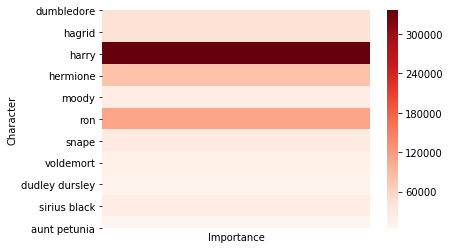

In [14]:
sorted_hp_dataframe = sorted_hp_dataframe.iloc[:20]
first_eleven_characters = take(11, combined_dict.items())
dictionary = {}
first_eleven_characters_dictionary = Convert(first_eleven_characters, dictionary)
data = pd.Series(first_eleven_characters_dictionary)
heat_map = sns.heatmap(data.to_frame(), xticklabels=False, cmap="Reds")
plt.xlabel("Importance")
plt.ylabel("Character")
plt.show()

## Let's Quote them!

In [18]:
import pandas as pd
import numpy as np
import PyPDF2
import csv
from pprint import pprint
import re
import pickle
from wordcloud import WordCloud, STOPWORDS 
import json
from ibm_watson import NaturalLanguageUnderstandingV1
from ibm_cloud_sdk_core.authenticators import IAMAuthenticator
from ibm_watson.natural_language_understanding_v1 import Features, EmotionOptions
from nltk import FreqDist
from nltk import PorterStemmer as porter
from nltk import WordNetLemmatizer as WNLemma
from textblob import TextBlob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

In [19]:
char_names = ['Albus','Dumbledore','Albus Dumbledore','McGonagall','Harry','Ron','Hermione'
              ,'Hagrid','Fred','George','Snape','Severus','Professor McGonagall', 'Tom Riddle','Sirius Black'
              ,'Lupin','Professor Lupin']
char_names_upper = [c.upper() for c in char_names] 
char_names_upper.append('PROFESSOR McGONAGALL')
print(char_names_upper)

['ALBUS', 'DUMBLEDORE', 'ALBUS DUMBLEDORE', 'MCGONAGALL', 'HARRY', 'RON', 'HERMIONE', 'HAGRID', 'FRED', 'GEORGE', 'SNAPE', 'SEVERUS', 'PROFESSOR MCGONAGALL', 'TOM RIDDLE', 'SIRIUS BLACK', 'LUPIN', 'PROFESSOR LUPIN', 'PROFESSOR McGONAGALL']


In [20]:
def safe_insert(dictionary, key, value):
    if key in dictionary:
        dictionary[key].append(value)
    else:
        dictionary[key] = list()
        dictionary[key].append(value)

def line_counts(dictionary):
    for key in dictionary:
        print(key, len(dictionary[key]))

In [21]:
hp1_character_lines = {}

with open('harryPotter.txt','r') as hp1:
    for line in hp1:
        if line.strip() and ':' in line:
            character = line.split(':')[0]
            dialogue = line.split(':')[1]
            cleaned_dialogue = re.sub(r'\{.*?\}', '', dialogue)
            
            if character in char_names and cleaned_dialogue.strip():
                safe_insert(hp1_character_lines, character, cleaned_dialogue.strip())

line_counts(hp1_character_lines)

Dumbledore 27
McGonagall 30
Hagrid 85
Harry 225
George 3
Fred 4
Ron 123
Hermione 89
Snape 10


In [22]:
hp1_character_lines =  {k.upper(): v for k, v in hp1_character_lines.items()}

In [23]:
line_counts(hp1_character_lines)

DUMBLEDORE 27
MCGONAGALL 30
HAGRID 85
HARRY 225
GEORGE 3
FRED 4
RON 123
HERMIONE 89
SNAPE 10


In [24]:
hp2_character_lines = {}
current_character = None
cur_line = ''

with open('harryPotter.txt','r') as hp2:
    for row in hp2:
        
        # Branch 1 ('HARRY', 'RON', 'FILCH', etc)
        if row.strip() == row.strip().upper() and row.strip() != '':  # new character is speaking
            if current_character:  # we care about this character
                safe_insert(hp2_character_lines, current_character, cur_line.strip())
            current_character = None
            cur_line = ''
            
        # Branch 2 ('HARRY', 'RON', etc)
        if row.strip() in char_names_upper:
            current_character = row.strip()
            
        # Branch 3 -- any dialogue
        elif row.strip() != row.strip().upper():
            cur_line += ' ' + row.strip()

            
line_counts(hp2_character_lines)


HARRY 1166
RON 592
FRED 57
GEORGE 47
HAGRID 121
HERMIONE 614
SNAPE 93
DUMBLEDORE 285
PROFESSOR MCGONAGALL 61
TOM RIDDLE 70
PROFESSOR LUPIN 86
SIRIUS BLACK 36
MCGONAGALL 21
LUPIN 18


In [25]:
pprint(hp2_character_lines)

{'DUMBLEDORE': ['They are not.',
                "I'm well aware of our bylaws, Severus, having written more "
                'than a few myself.  However, as Head of Gryffindor House, it '
                'is for Professor McGonagall to determine the appropriate '
                'action.',
                "Splendid.  Now, I suggest we return to the feast.  There's a "
                'delicious-looking custard tart I want to sample.',
                'Argus!',
                'Everyone will proceed to their dormitories immediately. '
                'Everyone except you three.',
                "She's not dead, Argus.  She's been Petrified.",
                "But how she's been Petrified... I cannot say.",
                'Innocent until proven guilty.',
                'We will be able to cure her, Argus.  As I understand it, '
                'Madam Sprout has a very healthy growth of Mandrakes.  When '
                'they have matured, a potion will be made which will revive '


              'Muggle-borns.',
              'Professor, what exactly does legend tell us lies within the '
              'Chamber?',
              "Yes.  Couldn't you tell: McGonagall's worried.  All the "
              'teachers are.',
              'The Heir of Slytherin has returned to Hogwarts.  The question '
              'is, who is it?',
              "If you're talking about him --",
              'I heard him.  But Malfoy?  The Heir of Slytherin?',
              "No.  Even they aren't that thick. But there might be another "
              "way. Mind you, it would be difficult. Not to mention we'd be "
              'breaking about fifty school rules.  And it would be dangerous.  '
              'Very dangerous.',
              "Here it is:  'The Polyjuice Potion.  Properly brewed, the "
              'Polyjuice Potion allows the drinker to transform himself '
              "temporarily into the physical form of another...'",
              'Yes.',
              "Exactly.  But

         'Don’t touch her!',
         'Stan Shunpike.',
         'Weasley... Barney Weasley.',
         'Piss off!  Arthur Weasley’s ten times the wizard you are!'],
 'SIRIUS BLACK': ['No.  Only one will die tonight.',
                  'Going to kill me, Harry?',
                  "You'd know all about the madness within, wouldn't you, "
                  'Remus?',
                  'Yes, you glow like the sun.  And you howl at the moon.  '
                  "Enough talk!  He dies.  Now.  If you won't do it with me, "
                  "Remus, I'll do it alone.",
                  'I did my waiting!  Twelve years of it!  In Azkaban!  Trust '
                  "me, you wouldn't have lasted a week!",
                  "It's a lie!  I never would've betrayed James and Lily!",
                  "No!  I wasn't there!  And I'll regret it the rest of my "
                  'life!',
                  "He's as good as dead.",
                  'Oh yes there is...',
                  'Come out,

In [26]:
def safe_combine(dictionary, key, value):
    if key not in dictionary:
        dictionary[key] = []
    dictionary[key].extend(value)

In [27]:
dialogues_dict = {}

for key, value in hp1_character_lines.items():
    safe_combine(dialogues_dict, key, value)
    
for key, value in hp2_character_lines.items():
    safe_combine(dialogues_dict, key, value)

In [28]:
line_counts(dialogues_dict)

DUMBLEDORE 312
MCGONAGALL 51
HAGRID 206
HARRY 1391
GEORGE 50
FRED 61
RON 715
HERMIONE 703
SNAPE 103
PROFESSOR MCGONAGALL 61
TOM RIDDLE 70
PROFESSOR LUPIN 86
SIRIUS BLACK 36
LUPIN 18


In [29]:
dialogues_dict['TOM RIDDLE']

['Professor Dumbledore.',
 'Yes, Professor.  I suppose I -- I just had to see for myself, if...',
 '... the rumors were true.',
 "About the school as well?  They wouldn't really close Hogwarts, would they, Professor?",
 'Sir?  If it all stopped.  If the person responsible was caught...',
 'No, sir.  Nothing.',
 'Evening, Hagrid.',
 "I'm going to have to turn you in, Hagrid.  I don't think you meant it to kill anyone --",
 "Hagrid.  The dead girl's parents will be here tomorrow.  The least Hogwarts can do is make sure the thing that killed their daughter is slaughtered.",
 "She won't wake.",
 "She's still alive.  But only just.",
 'A memory.  Preserved in a diary for fifty years.',
 "It won't come until it's called.",
 "You won't be needing it.",
 "I'm afraid I can't do that, Harry. You see, as poor Ginny grows weaker... I grow stronger.",
 "Yes.  I'm afraid so.  But then, she's been in so much pain, poor Ginny.  She's been writing to me for months, telling me all her pitiful worries an

In [31]:
list1 = []
happy = "You're a wizard, Harry"
for key, values in dialogues_dict.items():
    list1 = values;
    for x in list1:
        if (happy in x):
            print(key)


HAGRID


<br />
<left>
<img src="harry-wizard.gif" width=600 />
</left>

## Let us now see how each of the Characters felt, through their dialogues

Here, we run a Sentiment Analysis using the IBM-Watson API call. We ideally call the API because it gives a wider spectrum of emotions to gauge from rather than `polarity`

In [32]:
import nltk
import ssl 
"""SSL is used for creating a secured seesion for authentication"""
try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context



In [33]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from nltk.tokenize import sent_tokenize 

    
stop_words = set(stopwords.words('english')) 

def clean_data(val):
    """This function returns clean data. This function will take data from open file pointers and drop new line and tab characters.
    Convert all the characters to lowercase to minimize the vocabulary and removes all the english stop words"""
    #remove new line and tab characters
    val = val.strip('\\n') 
    val = val.strip('\\t')
    # replacing new line and tab characters with white spaces 
    val = val.replace('\\n','')
    val = val.replace('\\t','')
    word_tokens = word_tokenize(str(val).lower().strip('[]') )
    #filtering sentences with stop words
    filtered_sentence = [w for w in word_tokens if not w in stop_words] 

    filtered_sentence = [] 

    for w in word_tokens: 
        if w not in stop_words: 
            filtered_sentence.append(w) 

    return list(filtered_sentence)


In [34]:
Char_senti = {}

for key, values in dialogues_dict.items():
    v = list(set(clean_data(str(dialogues_dict[key]).strip('[]'))))
    Char_senti[key] = v


In [35]:
## Let's check for DUMBLEDORE 
Char_senti['DUMBLEDORE']

['mandrakes',
 'scar',
 'much',
 'wondering',
 'laced',
 'many',
 'sufficient',
 "'ll",
 'shrugs',
 'loads',
 'break',
 '10',
 'friendship',
 'bulgarian',
 'wandering',
 'nature',
 'mark',
 'hands',
 'sorry',
 'orders',
 'create',
 'arrival',
 'twitch',
 'apparate',
 'keen',
 'pomfrey',
 'finally',
 'traces',
 'welcome',
 'carefully',
 'hours',
 "'your",
 'doubt',
 'governors',
 "'lumos",
 'sitting',
 'anxious',
 'water',
 'activities',
 'transcribed',
 'eyepiece',
 'awarding',
 'babberton',
 'phoenix',
 'well',
 'vessel',
 "'let",
 'bertie',
 'task',
 'wintry',
 'speak',
 'sets',
 'ronald',
 "'because",
 "'how",
 'requests',
 'beat',
 'delights',
 'durmstrang',
 'need',
 'person',
 'prior',
 'leaking',
 'exactly',
 'little',
 "'dear",
 'embrace',
 'draco',
 'miss',
 '50',
 'disregard',
 'bad',
 'child',
 'appropriate',
 'molly',
 'wiser',
 'lord',
 'deepest',
 'behold',
 'cancelled',
 'worry',
 'negotiate',
 'sit',
 'cherry',
 'master',
 'voldemort',
 'caretaker',
 'families',
 'slugh

In [36]:
# Frequency Distribution
FD = {}
for key, values in Char_senti.items():
    v = FreqDist(Char_senti[key])
    FD[key] = v

FD

{'DUMBLEDORE': FreqDist({'mandrakes': 1, 'scar': 1, 'much': 1, 'wondering': 1, 'laced': 1, 'many': 1, 'sufficient': 1, "'ll": 1, 'shrugs': 1, 'loads': 1, ...}),
 'MCGONAGALL': FreqDist({'famous': 1, 'right': 1, 'ca': 1, 'many': 1, '...': 1, "'m": 1, 'prance': 1, 'flight': 1, 'rule': 1, 'taken': 1, ...}),
 'HAGRID': FreqDist({'mandrakes': 1, 'charm': 1, 'famous': 1, 'right': 1, 'ca': 1, 'knockturn': 1, 'acne': 1, 'wo': 1, 'many': 1, '...': 1, ...}),
 'HARRY': FreqDist({'scar': 1, 'much': 1, 'wondering': 1, 'ca': 1, 'many': 1, "'ll": 1, 'tosser': 1, 'loads': 1, 'peter': 1, 'standard': 1, ...}),
 'GEORGE': FreqDist({'room': 1, 'thank': 1, 'much': 1, 'wormtail': 1, 'begins': 1, 'ca': 1, '...': 1, 'clipping': 1, 'time': 1, "'ll": 1, ...}),
 'FRED': FreqDist({'room': 1, 'belgium': 1, 'says': 1, 'world': 1, 'joking': 1, 'right': 1, 'wo': 1, "'with": 1, '...': 1, 'nougats': 1, ...}),
 'RON': FreqDist({'much': 1, 'flick': 1, 'ca': 1, 'many': 1, "'rogue": 1, "'ll": 1, 'loads': 1, 'disappointed':

In [37]:
Char_string={}
for key, values in Char_senti.items():
    var=""
    for w in Char_senti[key]:
        var = var+' '+w
    Char_string[key] = var



In [38]:
Char_string['TOM RIDDLE']

" famous return scar much wrote ca many wo ... mere 'll 'm touching disappointed sixteen-year-old show ends future final extraordinary hands 'prove imagine back fears persuasive sends anymore managed hagrid whisper pitiful new move horcrux start anxious target -- well speak obeys tried happen escape writing sir 'how 'you people caught wizards lead powerful poor person set little 're hear doctor castle girl mad bad magical mudbloods n't lord strangling deepest songbird night driven want could voldemort misunderstand safe fool ! save decided grew turn killed slaughtered name words unwisely noble 'murder hat especially restricted damage 'speak process stop kill else might time talk 'this succeeded hogwarts innocent months old defeated cole soon years match dead meet going hurt trance minute 'voldemort across conversation 'sir challenged guess pouring 'what surely parents disappointment think power retiring minutes close everywhere walls body rather defeat ? belonged sorcerer 'yes opened n

In [39]:
bad_chars = [';', ':', '!', "*", '`','-', '.', '', "'"] 

for key, values in Char_string.items():
    for i in bad_chars : 
        Char_string[key] = Char_string[key].replace(i, '') 

In [40]:
Char_string['TOM RIDDLE']

' famous return scar much wrote ca many wo  mere ll m touching disappointed sixteenyearold show ends future final extraordinary hands prove imagine back fears persuasive sends anymore managed hagrid whisper pitiful new move horcrux start anxious target  well speak obeys tried happen escape writing sir how you people caught wizards lead powerful poor person set little re hear doctor castle girl mad bad magical mudbloods nt lord strangling deepest songbird night driven want could voldemort misunderstand safe fool  save decided grew turn killed slaughtered name words unwisely noble murder hat especially restricted damage speak process stop kill else might time talk this succeeded hogwarts innocent months old defeated cole soon years match dead meet going hurt trance minute voldemort across conversation sir challenged guess pouring what surely parents disappointment think power retiring minutes close everywhere walls body rather defeat ? belonged sorcerer yes opened number began behind out

In [41]:
dicti={}

authenticator = IAMAuthenticator('7iWlOedWeTpgREu12do8yDjjxHC3WiNrc593r4sAjrdC')
natural_language_understanding = NaturalLanguageUnderstandingV1(
   authenticator=authenticator,
    version='2019-07-25')
natural_language_understanding.set_service_url('https://gateway.watsonplatform.net/natural-language-understanding/api') 

for key, values in Char_string.items():
    response = natural_language_understanding.analyze(
    text=Char_string[key],
    features=Features(emotion=EmotionOptions())).get_result()
    print(key)
    print("======================================")
    dicti[key]=response["emotion"]["document"]["emotion"]
    print(json.dumps(response["emotion"]["document"]["emotion"], indent=2))
    


DUMBLEDORE
{
  "sadness": 0.380167,
  "joy": 0.281078,
  "fear": 0.465486,
  "disgust": 0.003037,
  "anger": 0.056657
}
MCGONAGALL
{
  "sadness": 0.185886,
  "joy": 0.51093,
  "fear": 0.172266,
  "disgust": 0.044087,
  "anger": 0.254881
}
HAGRID
{
  "sadness": 0.502108,
  "joy": 0.014755,
  "fear": 0.522653,
  "disgust": 0.069091,
  "anger": 0.253523
}
HARRY
{
  "sadness": 0.485183,
  "joy": 0.007454,
  "fear": 0.534457,
  "disgust": 0.059212,
  "anger": 0.281592
}
GEORGE
{
  "sadness": 0.57485,
  "joy": 0.07,
  "fear": 0.335426,
  "disgust": 0.101593,
  "anger": 0.251375
}
FRED
{
  "sadness": 0.307875,
  "joy": 0.397078,
  "fear": 0.065142,
  "disgust": 0.314117,
  "anger": 0.105691
}
RON
{
  "sadness": 0.492547,
  "joy": 0.009515,
  "fear": 0.560373,
  "disgust": 0.086889,
  "anger": 0.212484
}
HERMIONE
{
  "sadness": 0.455088,
  "joy": 0.021601,
  "fear": 0.660017,
  "disgust": 0.018563,
  "anger": 0.132358
}
SNAPE
{
  "sadness": 0.450926,
  "joy": 0.348255,
  "fear": 0.265387,
  "d

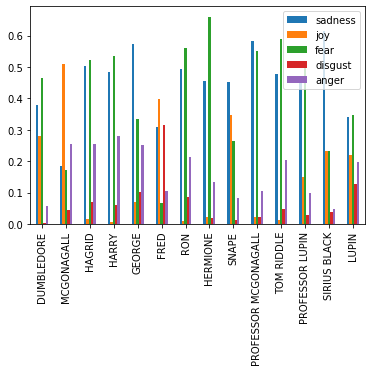

In [42]:
df = pd.DataFrame(dicti)

df.transpose().plot(kind='bar')

In [43]:
df.head()

,DUMBLEDORE,MCGONAGALL,HAGRID,HARRY,GEORGE,FRED,RON,HERMIONE,SNAPE,PROFESSOR MCGONAGALL,TOM RIDDLE,PROFESSOR LUPIN,SIRIUS BLACK,LUPIN
sadness,0.380167,0.185886,0.502108,0.485183,0.574850,0.307875,0.492547,0.455088,0.450926,0.582173,0.479387,0.460541,0.614914,0.340343
joy,0.281078,0.510930,0.014755,0.007454,0.070000,0.397078,0.009515,0.021601,0.348255,0.021203,0.013447,0.148730,0.233219,0.219180
fear,0.465486,0.172266,0.522653,0.534457,0.335426,0.065142,0.560373,0.660017,0.265387,0.551460,0.589737,0.517371,0.233286,0.348071
disgust,0.003037,0.044087,0.069091,0.059212,0.101593,0.314117,0.086889,0.018563,0.012649,0.021629,0.046999,0.026880,0.036967,0.127583
anger,0.056657,0.254881,0.253523,0.281592,0.251375,0.105691,0.212484,0.132358,0.082773,0.106179,0.202996,0.097175,0.049141,0.198735


In [44]:
##Summmation of Emotions to understand the complete of harry potter

df_t = df.transpose()
sadness = df_t['sadness'].sum()
joy = df_t['joy'].sum()
fear = df_t['fear'].sum()
disgust = df_t['disgust'].sum()
anger = df_t['anger'].sum()
height =[sadness, joy, fear, disgust, anger]
bars =['sadness', 'joy', 'fear', 'disgust', 'anger']

y_pos = np.arange(len(bars))


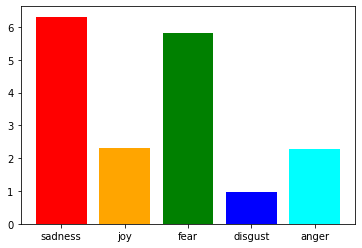

In [45]:
plt.bar(y_pos, height, color=['red', 'orange', 'green', 'blue', 'cyan'])
plt.xticks(y_pos, bars)
plt.show()


From this we find he more prominen emotion that we obtain from the manuscript is: **Sadness** 

We offcourse we agree, Albus Dumbeldore died !!!! And Snape tooo! And not to forget Dobby too!

<br />
<left>
<img src="Dumbledore-Died.gif" width=600 />
</left>



## Let's try Magic?

<br />
<left>
<img src="Leviossa.gif" width=600 />
</left>


# House Analysis On Harry Potter :

**First some imports for housekeeping**

In [47]:
import os, pdftotext
import matplotlib.pyplot as plt

**Some setup** 

In [48]:
plt.close('all')
path = os.getcwd()
series_houses = {}

**For Loop that goes through the series and finds all mentions of houses in each book**

In [49]:
for file in os.listdir(path):
    
    if (file.endswith(".txt") and not ("requirements.txt") in file):

        # Open the file in read mode
        text = open(file, "r")

        # Create an empty dictionary for words in book
        d = dict()

        # Create an outer dictionary for all books
        book_houses = dict()

        # Loop through each line of the file
        for line in text:
            # Remove the leading spaces and newline character
            line = line.strip()

            # Convert the characters in line to lowercase to avoid case mismatch
            line = line.lower()

            # Split the line into words
            words = line.split(" ")

            # Iterate over each word in line
            for word in words:
                
                # Check if the word is already in dictionary
                if word in d:
                    
                    # Increment count of word by 1
                    d[word] = d[word] + 1
                
                else:
                    
                    # Add the word to dictionary with count 1
                    d[word] = 1

        # Append the contents of houses in outer dictionary
        for key in list(d.keys()):
            houses = ["gryffindor", "hufflepuff", "ravenclaw", "slytherin"]
            if (key in sorted(houses)):
                book_houses[key] = d[key]
        series_houses[file[:-4]] = book_houses

**Now we plot the importance of house in each of the 7 books!**

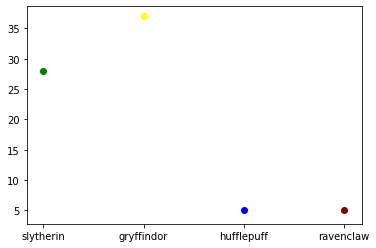

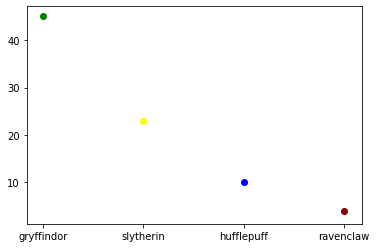

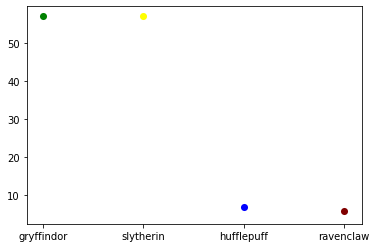

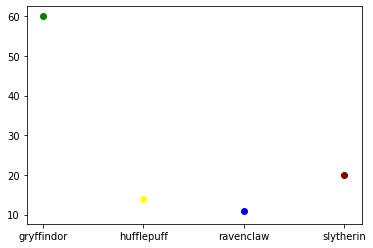

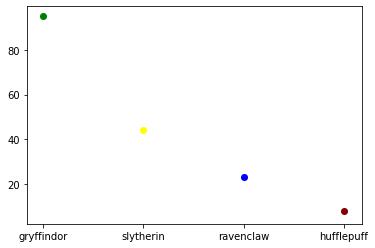

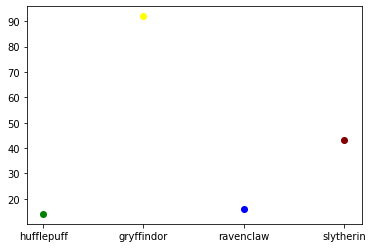

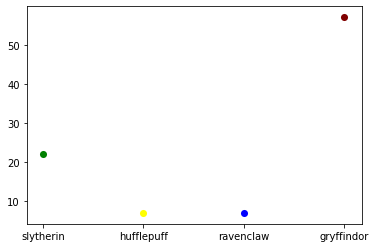

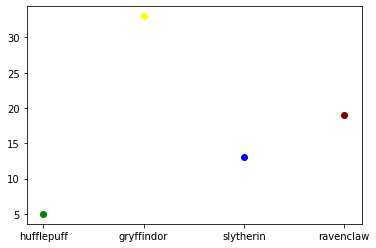

In [50]:
for k in series_houses.keys():
    colours = ['green', 'yellow', 'blue', 'maroon']
    fig = plt.figure()
    ax = fig.add_subplot(111)
    for colour, (x, ys) in zip(colours, series_houses[k].items()):
        ax.scatter([x], ys, c=colour, linewidth=0, s=50)
    plt.show()

# Generating Word Clouds :

**First we get our house in order with our requisite imports ofcourse....sorry for the repitition!**

In [51]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
import csv, os

**We then write a function to ingest each of the 7-part Harry Potter series in csv form and generate a word cloud**

In [52]:
def word_cloud_generator(path):
    for file in os.listdir(path):
        if (file.endswith(".csv")):
            
            # Reads converted harry potter .csv file
            df = pd.read_csv(file, encoding = "latin-1")
            df.columns.values[1] = "CONTENT"
            comment_words = ' '
            stopwords = set(STOPWORDS)
            
            # Iterates through the csv filed
            for val in df.CONTENT:
                
                # Typecastes each val to string
                val = str(val)
                
                # Splits the value
                tokens = val.split()
                
                # Converts each token into lowercase
                for i in range(len(tokens)):
                    tokens[i] = tokens[i].lower()
                for words in tokens:
                    comment_words = comment_words + words + ' '
            cleansed_comment_words = comment_words.replace('free', '').replace('tutorial', '').replace('passuneb', '').replace('video', '').replace('nan', '').replace('â', '')
            wordcloud = WordCloud(width = 800, height = 800, background_color = 'white', stopwords = stopwords, min_font_size = 10).generate(cleansed_comment_words)
            
            # Plots the WordCloud images
            plt.figure(figsize = (8, 8), facecolor = None)
            plt.imshow(wordcloud)
            plt.axis("off")
            plt.tight_layout(pad = 0)
            plt.show()

**Now we simply call the above function from the right directory to generate our wordclouds!**

</br >
<center>
<img src="download.png" width=600 />
</center>